# AWC Estimation

This program evaluates the Available water capacity (AWC) value in inches per foot of thickness accordingly to Westenbroek et al., 2010.

The program gets the input for a given area (that include the Po river basin) form SoilGrid System. The input provided by the online service include the clay and the sand percent contained in the soil for a dept between 0 and 100 cm.
The clay and sand content are used to evaluate the soil texture group accordingly the USDA Triangle.
Using the soil texture group is possible to evaluate the AWC value using the table reported in Westenbroek et al., 2010.

<table style="width:100%">
  <tr>
    <th>Soil texture</th>
    <th>Available water capacity <br>
    (inches per foot of thickness)</th>
    </tr>
  <tr>
    <td>Sand</td>
    <td>1.20</td>
  </tr>
  <tr>
    <td>Loamy sand</td>
    <td>1.40</td>
  </tr>
    <tr>
    <td>Sandy loam</td>
    <td>1.60</td>
  </tr>
    <tr>
    <td>Fine sandy loam</td>
    <td>1.80</td>
  </tr>
    <tr>
    <td>Very fine sandy loam</td>
    <td>2.00</td>
  </tr>
    <tr>
    <td>Loam</td>
    <td>2.20</td>
  </tr>
    <tr>
    <td>Silt loam</td>
    <td>2.40</td>
  </tr>
      <tr>
    <td>Silt</td>
    <td>2.55</td>
  </tr>
      <tr>
    <td>Sandy clay loam</td>
    <td>2.70</td>
  </tr>
      <tr>
    <td>Silty clay loam</td>
    <td>2.85</td>
    </tr>
      <tr>
    <td>Clay loam</td>
    <td>3.00</td>
  </tr>
    </tr>
      <tr>
    <td>Sandy clay</td>
    <td>3.20</td>
  </tr>
        <tr>
    <td>Silty clay</td>
    <td>3.40</td>
  </tr>
        <tr>
    <td>Clay </td>
    <td>3.60</td>
  </tr>
</table>


input required: soil_texture.xlsx that contains the soil texture triangle


# Libraries installation

The first library installed is owslib. This library will be used to load the WCS maps directly form the SoilGrid maps server. The second library installed is rasterio. this library allowed to elaborate save and load the raster files. it will be used to elaborate the maps loaded form SoilGrid.

In [ ]:
pip install owslib

In [ ]:
pip install rasterio

# Load data

The next step in the code is to load the data. The input data are from the SoilGrid system. SoilGrid is a machine learning method for mapping the spatial distribution of soil properties at a global scale. (for more details: https://www.isric.org/explore/soilgrids)

It is firstly selected the area of interest. The area should be provided as a box expressed in coordinates in CRS (coordinate reference system) EPSG 54012. Once the area is selected, the code will load Clay content, sand content bulk density information from the server. After each upload, the code will save a geolocated raster image (.tif format) and display the saved information.

In [ ]:
# area selection (coords box) it must be provided the bottom lef corner coordinates followed by the top right corner cordinates
bbox = (540000, 5400000, 1100000, 5740000)

In [ ]:
# importing the WCS data loading function istalled in the previous section of the code.
from owslib.wcs import WebCoverageService
# importing the WCS data loading function istalled in the previous section of the code.
clay_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/clay.map', version='1.0.0', timeout=120)
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
clay0_5 = rasterio.open(".northIT_clay_0-5_mean.tif", driver="GTiff")

# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# open the saved file as a raster
clay5_15 = rasterio.open(".northIT_clay_5-15_mean.tif", driver="GTiff")

# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay15_30 = rasterio.open(".northIT_clay_15-30_mean.tif", driver="GTiff")

# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay30_60 = rasterio.open(".northIT_clay_30-60_mean.tif", driver="GTiff")

# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
clay60_100 = rasterio.open(".northIT_clay_60-100_mean.tif", driver="GTiff")

#evaluate the Weighted average in the first meter of soil
clay0_100 = clay0_5.read(1)*(5/100) + clay5_15.read(1)*(10/100) + clay15_30.read(1)*(15/100) + clay30_60.read(1)*(30/100) + clay60_100.read(1)*(40/100)
clay = clay0_5.meta
clay.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_clay_0-100_mean.tif', 'w', **clay) as dst:
        dst.write_band(1, clay0_100.astype(rasterio.float32))
#open the saved file
clay = rasterio.open("northIT_clay_0-100_mean.tif", driver="GTiff")

In [ ]:
# load the plot function od rasterio
from rasterio import plot as rplt
%matplotlib inline
# plot the georeferenced data
rplt.show(clay0_100, title='north IT % clay 0-100 cm', cmap='pink')

In [ ]:
# importing the WCS data loading function istalled in the previous section of the code.
sand_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/sand.map', version='1.0.0')
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand0_5 = rasterio.open(".northIT_sand_0-5_mean.tif", driver="GTiff")

# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand5_15 = rasterio.open(".northIT_sand_5-15_mean.tif", driver="GTiff")

# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand15_30 = rasterio.open(".northIT_sand_15-30_mean.tif", driver="GTiff")

# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand30_60 = rasterio.open(".northIT_sand_30-60_mean.tif", driver="GTiff")

# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand60_100 = rasterio.open(".northIT_sand_60-100_mean.tif", driver="GTiff")

sand0_100 = sand0_5.read(1)*(5/100) + sand5_15.read(1)*(10/100) + sand15_30.read(1)*(15/100) + sand30_60.read(1)*(30/100) + sand60_100.read(1)*(40/100)
sand = sand0_5.meta
sand.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_sand_0-100_mean.tif', 'w', **sand) as dst:
        dst.write_band(1, sand0_100.astype(rasterio.float32))
#open the saved file
sand = rasterio.open("northIT_sand_0-100_mean.tif", driver="GTiff")


In [ ]:
# plot the georeferenced data
rplt.show(sand0_100, title='north IT % sand 0-100 cm', cmap='pink')

#Load soil texture table

In the following section the table containing the soil texture table is loaded.
The table must be contained in a .xlsx file and must contain the polygons shapes that are represented on the following diagram.

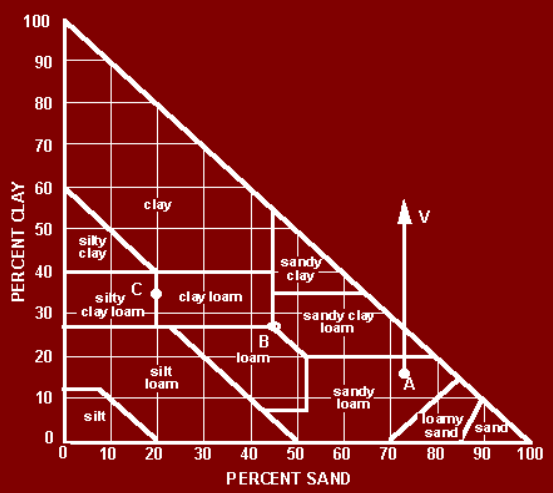

*(modified from Gerakis, A., and B. Baer. 1999)*

Please, before run put the soil_texture.xlsx file in the directory folder. 


In [ ]:
# import the pandas library for the dataframe managing
import pandas as pd
# import form the shaply library the fuction point and Polygon to trasform the 
# input raster gfeoreferenced data into a table point object and to transform 
# the loaded Table's polygon points in to a Polygon object
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# load data from the .xlsx file and transform them in Polygons 
soil_texture = pd.read_excel('soil_texture.xlsx',sheet_name='soil_texture') #high bulk density

#trasnform dataset info into polygons
silt = pd.DataFrame(soil_texture, columns= ['silt x','silt y'])
silt.dropna(subset = ["silt x"], inplace=True)
silt_p = Polygon(silt.values.tolist())

silt_loam = pd.DataFrame(soil_texture, columns= ['silt loam x','silt loam y'])
silt_loam.dropna(subset = ["silt loam x"], inplace=True)
silt_loam_p = Polygon(silt_loam.values.tolist())

silty_clay_loam = pd.DataFrame(soil_texture, columns= ['silty clay loam x','silty clay loam y'])
silty_clay_loam.dropna(subset = ["silty clay loam x"], inplace=True)
silty_clay_loam_p = Polygon(silty_clay_loam.values.tolist())

silty_clay = pd.DataFrame(soil_texture, columns= ['silty clay x','silty clay y'])
silty_clay.dropna(subset = ["silty clay x"], inplace=True)
silty_clay_p = Polygon(silty_clay.values.tolist())

clay = pd.DataFrame(soil_texture, columns= ['clay x','clay y'])
clay.dropna(subset = ["clay x"], inplace=True)
clay_p = Polygon(clay.values.tolist())

clay_loam = pd.DataFrame(soil_texture, columns= ['clay loam x','clay loam y'])
clay_loam.dropna(subset = ["clay loam x"], inplace=True)
clay_loam_p = Polygon(clay_loam.values.tolist())

loam = pd.DataFrame(soil_texture, columns= ['loam x','loam y'])
loam.dropna(subset = ["loam x"], inplace=True)
loam_p = Polygon(loam.values.tolist())

sandy_clay = pd.DataFrame(soil_texture, columns= ['sandy clay x','sandy clay y'])
sandy_clay.dropna(subset = ["sandy clay x"], inplace=True)
sandy_clay_p = Polygon(sandy_clay.values.tolist())

sandy_clay_loam = pd.DataFrame(soil_texture, columns= ['sandy clay loam x','sandy clay loam y'])
sandy_clay_loam.dropna(subset = ["sandy clay loam x"], inplace=True)
sandy_clay_loam_p =  Polygon(sandy_clay_loam.values.tolist())

sandy_loam = pd.DataFrame(soil_texture, columns= ['sandy loam x','sandy loam y'])
sandy_loam.dropna(subset = ["sandy loam x"], inplace=True)
sandy_loam_p =  Polygon(sandy_loam.values.tolist())

loamy_sand = pd.DataFrame(soil_texture, columns= ['loamy sand x','loamy sand y'])
loamy_sand.dropna(subset = ["loamy sand x"], inplace=True)
loamy_sand_p =  Polygon(loamy_sand.values.tolist())

sand = pd.DataFrame(soil_texture, columns= ['sand x','sand y'])
sand.dropna(subset = ["sand x"], inplace=True)
sand_p =  Polygon(sand.values.tolist())

#Soil texture classification and AWC evaluation

In  the following section is evaluated the AWC value for every pixel of the loaded raster data. The AWC value is assigned using the soil texture group evaluate in the previous code section accordingly with the table reported in the introduction.



In [ ]:
import numpy as np

# convert the UDM
x = sand0_100/1000
y = clay0_100/1000

#assing to every point a soil texture (check in which polygon a point is of the image above)
soil_T = np.zeros(np.shape(x))
soil_Tm = (1)
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        point = Point(x[i,j],y[i,j])
        if x[i,j] == 0 and y[i,j] == 0: #mare or no-data
            soil_T[i,j] = -1
        elif silt_p.contains(point):
            soil_T[i,j] = 2.55
        elif silt_loam_p.contains(point):
            soil_T[i,j] = 2.40
        elif silty_clay_loam_p.contains(point):
            soil_T[i,j] = 2.85
        elif silty_clay_p.contains(point):
            soil_T[i,j] = 3.40
        elif clay_p.contains(point):
            soil_T[i,j] = 3.60
        elif clay_loam_p.contains(point):
            soil_T[i,j] = 3.00
        elif loam_p.contains(point):
            soil_T[i,j] = 2.20
        elif sandy_clay_p.contains(point):
            soil_T[i,j] = 3.20
        elif sandy_clay_loam_p.contains(point):
            soil_T[i,j] = 2.70
        elif sandy_loam_p.contains(point):
            soil_T[i,j] = 1.80
        elif loamy_sand_p.contains(point):
            soil_T[i,j] = 1.40
        elif sand_p.contains(point):
            soil_T[i,j] = 1.20
        else:
            soil_T[i,j] = soil_Tm
        soil_Tm = soil_T[i,j] # dato precedente: se il dato non è presente viene assegnato il gruppo della cella accanto


Text(0.5, 1.0, 'AWC')

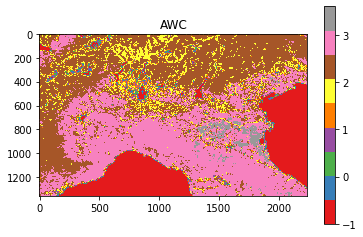

In [ ]:
import matplotlib.pyplot as plt

# result plotting (with plot bar not available rasterio plotting tool)
plt.imshow(soil_T, cmap='Set1',)
plt.colorbar()
plt.title('AWC')

In [ ]:
# save AWC file

AWC = clay0_5.meta
AWC.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('AWC.tif', 'w', **AWC) as dst:
        dst.write_band(1, soil_T.astype(rasterio.float32))

# Referces

Westenbroek, S.M., Kelson, V.A.,  Dripps, W.R.,Hunt, R.J.,and Bradbury, K.R. 2010. SWB-A modified Thornthwaite-Mather Soil-Water-Balance code for estimating groundwater recharge. 10.3133/tm6A31.USGS Publications Warehouse. http://pubs.er.usgs.gov/publication/tm6A31

Gerakis, A., and B. Baer. 1999. A computer program for soil textural classification. Soil Science Society of America Journal 63:807-808.